In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Gathering data about football players from Central Europe with posibility to add new leagues.

In [161]:
df_overall_data = pd.read_csv("data.csv")
df_bio = pd.read_csv("players_bio_data.csv")

In [162]:
df_overall_data.head()

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,goals,minutes_played
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,https://www.transfermarkt.com/vladan-kovacevic...,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,0,1920
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,https://www.transfermarkt.com/kacper-trelowski...,Goalkeeper,19.0,Poland,28,8,0,720
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,https://www.transfermarkt.com/xavier-dziekonsk...,Goalkeeper,19.0,Poland,4,0,0,0
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,https://www.transfermarkt.com/jakub-rajczykows...,Goalkeeper,18.0,Poland,8,0,0,0
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,https://www.transfermarkt.com/stratos-svarnas/...,Centre-Back,25.0,Greece,29,24,3,2182


In [163]:
df_bio.head()

,player_name,name_in_home_country,date_of_birth,place_of_birth,age,height,citizenship,position,foot,player_agent,...,na,on_loan_from,contract_there_expires,twitter,facebook,x2nd_club,full_name,website,x3nd_club,date_of_death
0,Vladan Kovacevic,Vladan Kova�evi�,1998-04-11,Banja Luka,24.0,1.92,Bosnia-Herzegovina Serbia,Goalkeeper,right,firsteleven ISM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kacper Trelowski,Kacper Trelowski,2003-08-19,Cz�stochowa,19.0,1.93,Poland,Goalkeeper,both,INNfootball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xavier Dziekonski,Xavier Dzieko�ski,2003-10-06,Grajewo,19.0,1.88,Poland,Goalkeeper,right,BMG-SPORT,...,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jakub Rajczykowski,NaN,2005-02-04,NaN,18.0,NaN,Poland,Goalkeeper,NaN,KFM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stratos Svarnas,<U+03A3><U+03C4><U+03C1><U+03AC><U+03C4><U+03B...,1997-11-11,Athen,25.0,1.86,Greece,Defender - Centre-Back,right,P&P Sport Management S.A.M.,...,NaN,AEK Athens,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df_overall_data.shape[0], df_bio.shape[0]

(6596, 6594)

In [165]:
df = pd.merge(df_overall_data, df_bio, how="outer", on=["player_name"]).drop_duplicates()
player_url = df["player_url"]

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 0 to 7548
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   team_name                        6671 non-null   object 
 1   league                           6671 non-null   object 
 2   country                          6671 non-null   object 
 3   player_name                      6676 non-null   object 
 4   player_url                       6671 non-null   object 
 5   player_pos                       6671 non-null   object 
 6   player_age                       6650 non-null   float64
 7   nationality                      6671 non-null   object 
 8   in_squad                         6671 non-null   float64
 9   appearances                      6671 non-null   float64
 10  goals                            6671 non-null   float64
 11  minutes_played                   6671 non-null   float64
 12  name_in_home_country

In [167]:
df.head()

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,...,na,on_loan_from,contract_there_expires,twitter,facebook,x2nd_club,full_name,website,x3nd_club,date_of_death
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,https://www.transfermarkt.com/vladan-kovacevic...,Goalkeeper,24.0,Bosnia-Herzegovina,23.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,https://www.transfermarkt.com/kacper-trelowski...,Goalkeeper,19.0,Poland,28.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,https://www.transfermarkt.com/xavier-dziekonsk...,Goalkeeper,19.0,Poland,4.0,0.0,...,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,https://www.transfermarkt.com/jakub-rajczykows...,Goalkeeper,18.0,Poland,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,https://www.transfermarkt.com/stratos-svarnas/...,Centre-Back,25.0,Greece,29.0,24.0,...,NaN,AEK Athens,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df["player_name"] = df["player_url"].apply(
    lambda x: str(x).split("/")[3].replace("-", " ").title() if "transfermarkt" in str(x) else x)

In [169]:
# print(df["player_url"].unique())

In [170]:
df = df[['team_name',
         'league',
         'country',
         'player_name',
         'player_pos',
         'player_age',
         'nationality',
         'in_squad',
         'appearances',
         'goals',
         'minutes_played',
         'height',
         'foot',
         'player_agent',
         'joined',
         'contract_expires',
         'date_of_last_contract_extension',
         'outfitter',
         'player_valuation',
         'max_player_valuation',
         'max_player_valuation_date',
         'contract_option',
         'on_loan_from',
         'contract_there_expires']]
df["goals_per_game"] = df.goals / df.appearances

In [171]:
df.head()

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,contract_expires,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,Goalkeeper,24.0,Bosnia-Herzegovina,23.0,21.0,0.0,...,2026-06-30,2022-07-07,Uhlsport,5000000.0,5000000.0,2022-09-29,NaN,NaN,NaN,0.000
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,Goalkeeper,19.0,Poland,28.0,8.0,0.0,...,2025-06-30,2022-02-15,adidas,NaN,NaN,2021-12-31,Option for a further year,NaN,NaN,0.000
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,Goalkeeper,19.0,Poland,4.0,0.0,0.0,...,2023-06-30,NaN,Nike,NaN,1500000.0,2021-05-21,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,Goalkeeper,18.0,Poland,8.0,0.0,0.0,...,2025-06-30,NaN,NaN,NaN,NaN,2022-09-29,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,Centre-Back,25.0,Greece,29.0,24.0,3.0,...,2023-06-30,NaN,NaN,2000000.0,2000000.0,2022-11-16,Option to buy,AEK Athens,"Jun 30, 2025",0.125


In [172]:
df.player_agent.unique()

array(['firsteleven ISM', 'INNfootball', 'BMG-SPORT', ..., 'Eurofoot4all',
       'Sport Futbol', 'Gustavo de la Parra'], dtype=object)

In [173]:
def position_name(x):
    pos_dict = {'Goalkeeper': 'GK',
                'Centre-Back': 'CB',
                'Attacking Midfield': 'AM',
                'Right Midfield': 'RM',
                'Defensive Midfield': 'DM',
                'Left Midfield': 'LM',
                'Central Midfield': 'CM',
                'Centre-Forward': 'CF',
                'Right-Back': 'RB',
                'Left-Back': 'LB',
                'Left Winger': 'LW',
                'Right Winger': 'RW',
                'midfield': 'CM',
                'Second Striker': 'SecST',
                'Attack': 'ST',
                'Defender': 'CB'}
    try:
        return pos_dict[x]
    except:
        return x

In [174]:
df["player_pos"] = df["player_pos"].apply(lambda x: position_name(x))

In [175]:
df.head()

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,contract_expires,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,GK,24.0,Bosnia-Herzegovina,23.0,21.0,0.0,...,2026-06-30,2022-07-07,Uhlsport,5000000.0,5000000.0,2022-09-29,NaN,NaN,NaN,0.000
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,GK,19.0,Poland,28.0,8.0,0.0,...,2025-06-30,2022-02-15,adidas,NaN,NaN,2021-12-31,Option for a further year,NaN,NaN,0.000
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,GK,19.0,Poland,4.0,0.0,0.0,...,2023-06-30,NaN,Nike,NaN,1500000.0,2021-05-21,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,GK,18.0,Poland,8.0,0.0,0.0,...,2025-06-30,NaN,NaN,NaN,NaN,2022-09-29,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,CB,25.0,Greece,29.0,24.0,3.0,...,2023-06-30,NaN,NaN,2000000.0,2000000.0,2022-11-16,Option to buy,AEK Athens,"Jun 30, 2025",0.125


In [176]:
df_RKS = df.query("team_name == 'Rakow Czestochowa'")

<AxesSubplot: >

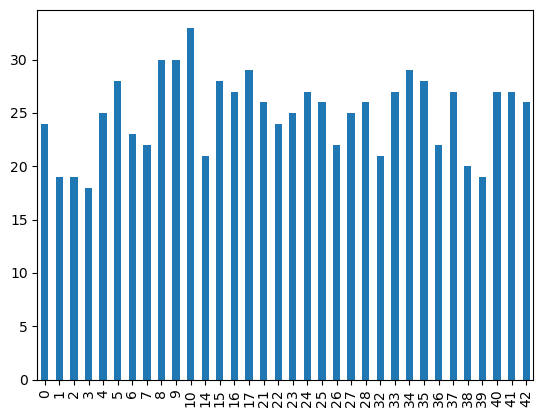

In [177]:
df_RKS["player_age"].plot(kind='bar')

In [178]:
df_RKS["player_age"].mean()

25.0

In [179]:
starting_eleven = df_RKS.sort_values(by="minutes_played", ascending=False)[:11]

In [180]:
starting_eleven["player_age"].min(), starting_eleven["player_age"].max()

(24.0, 30.0)

In [181]:
df_RKS.groupby(by="player_pos").count()["team_name"]

player_pos
AM    7
CB    8
CF    3
CM    5
DM    2
GK    4
LM    2
RM    3
Name: team_name, dtype: int64

In [182]:
df_RKS.groupby(by="nationality").count()["team_name"]

nationality
Bosnia-Herzegovina     1
Croatia                2
Czech Republic         1
Georgia                1
Greece                 2
Latvia                 1
Poland                18
Portugal               1
Romania                2
Serbia                 1
Spain                  2
Sweden                 1
Ukraine                1
Name: team_name, dtype: int64

In [183]:
df.groupby(by="nationality").count().sort_values("player_name", ascending=False)[:11]["player_name"]

nationality
Serbia                693
Greece                475
Croatia               461
Czech Republic        454
Bosnia-Herzegovina    401
Poland                386
Montenegro            365
North Macedonia       355
Bulgaria              351
Albania               291
Austria               283
Name: player_name, dtype: int64

<h3>Let's add players' coutries population to our data set!

In [184]:
print(df.nationality.unique().tolist())

['Bosnia-Herzegovina', 'Poland', 'Greece', 'Croatia', 'Romania', 'Czech Republic', 'Serbia', 'Spain', 'Ukraine', 'Sweden', 'Portugal', 'Georgia', 'Latvia', 'Slovakia', 'Scotland', 'Norway', "Cote d'Ivoire", 'Mauritius', 'Israel', 'Germany', 'Albania', 'Kosovo', 'Slovenia', 'Brazil', 'Austria', 'Armenia', 'Iran', 'Finland', 'Denmark', 'North Macedonia', 'Japan', 'Lithuania', 'France', 'The Gambia', 'Cameroon', 'Switzerland', 'Netherlands', 'Turkey', 'Mali', 'Bulgaria', 'England', 'Hungary', 'Estonia', 'Azerbaijan', 'Iceland', 'Belgium', 'Guinea-Bissau', 'DR Congo', 'South Africa', 'Cape Verde', 'Colombia', 'Dominican Republic', 'Curacao', 'Montenegro', 'Mexico', 'Argentina', 'Chile', 'Canada', 'Belarus', 'Liberia', 'Nigeria', 'Australia', 'Benin', 'Senegal', 'Angola', 'Iraq', 'Russia', 'Korea, South', 'Malaysia', 'Ghana', 'Martinique', 'Guinea', 'United States', 'Suriname', 'Morocco', 'Panama', 'Congo', 'Wales', 'Venezuela', 'Moldova', 'Cyprus', 'Niger', 'Burkina Faso', 'Burundi', 'Tuni

In [185]:
population_dict = {'Bosnia-Herzegovina': 3280819, 'Poland': 37950802, 'Greece': 10473455, 'Croatia': 4087843,
                   'Romania': 19237682, 'Czech Republic': 10724567, 'Serbia': 6908224, 'Spain': 46754778,
                   'Ukraine': 43733762, 'Sweden': 10160115, 'Portugal': 10191409, 'Georgia': 3989167, 'Latvia': 1901548,
                   'Slovakia': 5457013, 'Scotland': 5463300, 'Norway': 5421241, "Cote d'Ivoire": 26378274,
                   'Mauritius': 1265577, 'Israel': 8891800, 'Germany': 83240525, 'Albania': 2854191, 'Kosovo': 1791034,
                   'Slovenia': 2079976, 'Brazil': 212559417, 'Austria': 8917205, 'Armenia': 2963243, 'Iran': 84571111,
                   'Finland': 5540720, 'Denmark': 5822763, 'North Macedonia': 2083374, 'Japan': 126050000,
                   'Lithuania': 2722289, 'France': 67391582, 'The Gambia': 2347706, 'Cameroon': 26545864,
                   'Switzerland': 8715866, 'Netherlands': 17173000, 'Turkey': 84339067, 'Mali': 20250834,
                   'Bulgaria': 6975761, 'England': 56286961, 'Hungary': 9764000, 'Estonia': 1321977,
                   'Azerbaijan': 10139177, 'Iceland': 341243, 'Belgium': 11556247, 'Guinea-Bissau': 1968001,
                   'DR Congo': 101780263, 'South Africa': 59966000, 'Cape Verde': 549935, 'Colombia': 50339443,
                   'Dominican Republic': 10738958, 'Curacao': 157538, 'Montenegro': 628066, 'Mexico': 130222815,
                   'Argentina': 45605822, 'Chile': 19116209, 'Canada': 38131104, 'Belarus': 9417849, 'Liberia': 5057681,
                   'Nigeria': 200963599, 'Australia': 25499881, 'Benin': 12123200, 'Senegal': 15854360,
                   'Angola': 31825295, 'Iraq': 40222493, 'Russia': 144373535, 'Korea, South': 51269185,
                   'Malaysia': 32722760, 'Ghana': 30417856, 'Martinique': 375673, 'Guinea': 12771246,
                   'United States': 332915073, 'Suriname': 597927, 'Morocco': 36471769, 'Panama': 4246439,
                   'Congo': 5380508, 'Wales': 3139000, 'Venezuela': 28515829, 'Moldova': 2657637, 'Cyprus': 1207359,
                   'Niger': 24566000, 'Burkina Faso': 20903000, 'Burundi': 12256000, 'Tunisia': 11935000,
                   'Honduras': 10097000, 'Luxembourg': 633000, 'Italy': 60483000, 'Comoros': 877000,
                   'China': 1411778724, 'Uruguay': 3477000, 'Algeria': 44616626, 'Togo': 8279000, 'Jamaica': 2963000,
                   'Kenya': 52574000, 'Gabon': 2172900, 'Zambia': 18978000, 'Mauritania': 4643000,
                   'Solomon Islands': 686000, 'Southern Sudan': 10980000, 'Tanzania': 59632000,
                   'Central African Republic': 4829000, 'Haiti': 11402000, 'Tajikistan': 9576000, 'Palestine': 4981000,
                   'Mozambique': 31255000, 'Madagascar': 28020000, 'Costa Rica': 5094000, 'Uganda': 44517000,
                   'Libya': 6871300, 'Sierra Leone': 7977000, 'Egypt': 102334000, 'Trinidad and Tobago': 1390000,
                   'Paraguay': 7132530, 'Saudi Arabia': 34814000, 'New Zealand': 4987000, 'Syria': 17502000,
                   'Indonesia': 273523615, 'Bolivia': 11633000, 'Saint-Martin': 38666, 'Jordan': 10269416}

In [186]:
df["player_population"] = df["nationality"].apply(lambda x: population_dict[x] if x in population_dict.keys() else None)

In [187]:
df_greece = df.query("country=='Greece'")

In [188]:
df_greece.describe().T

,count,mean,std,min,25%,50%,75%,max
player_age,797.0,2.549937e+01,4.849137e+00,15.00,22.00,25.00,2.900000e+01,3.900000e+01
in_squad,798.0,1.341479e+01,7.992759e+00,0.00,7.00,15.00,1.800000e+01,3.600000e+01
appearances,798.0,1.018672e+01,7.983922e+00,0.00,2.00,10.00,1.700000e+01,3.400000e+01
goals,798.0,7.393484e-01,1.683108e+00,0.00,0.00,0.00,1.000000e+00,1.400000e+01
minutes_played,798.0,6.705501e+02,6.234080e+02,0.00,69.50,529.50,1.203000e+03,2.714000e+03
height,720.0,1.810764e+00,6.729298e-02,1.64,1.76,1.81,1.860000e+00,1.990000e+00
player_valuation,126.0,2.731746e+06,2.024160e+06,1000000.00,1500000.00,2000000.00,3.500000e+06,1.200000e+07
max_player_valuation,244.0,5.309426e+06,8.502883e+06,1000000.00,1500000.00,2500000.00,5.000000e+06,8.000000e+07
goals_per_game,673.0,5.775288e-02,1.126638e-01,0.00,0.00,0.00,7.407407e-02,1.000000e+00
player_population,798.0,2.535477e+07,4.311583e+07,38666.00,10473455.00,10473455.00,1.717300e+07,3.329151e+08


In [191]:
filtered_greece = df_greece[["player_name", "goals", "appearances", "goals_per_game", "player_age", "player_valuation",
                             "max_player_valuation"]].query("goals>=8")

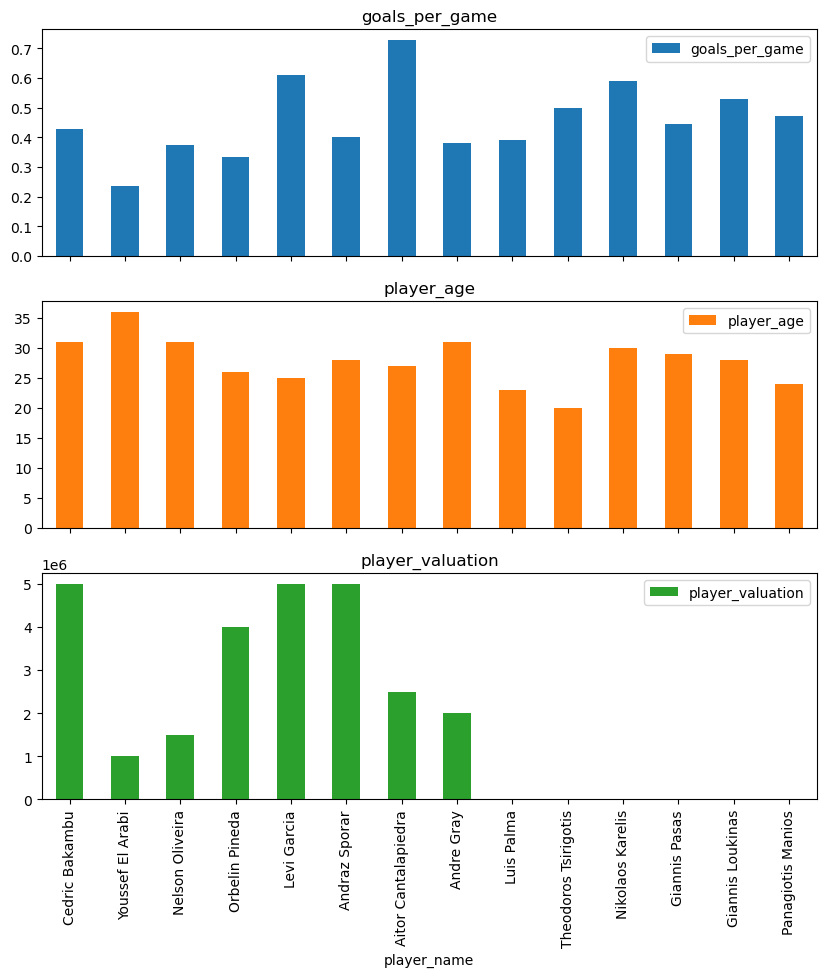

In [205]:
filtered_greece.plot(kind="bar", x="player_name", y=["goals_per_game", "player_age", "player_valuation"], subplots=True,
                     figsize=(10, 10))
plt.show()

In [208]:
df.query("player_age<25 and goals_per_game>0.5 and appearances>5")

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game,player_population
233,ViOn Zlate Moravce-Vrable,Fortuna Liga,Slovakia,Filip Balaj,CF,22.0,Slovakia,33.0,32.0,17.0,...,NaN,NaN,NaN,NaN,2021-06-26,NaN,Cracovia,"Jun 30, 2024",0.531250,5457013.0
805,AC Sparta Prague,Fortuna Liga,Czech Republic,Tomas Cvancara,CF,22.0,Czech Republic,19.0,19.0,10.0,...,2023-01-26,NaN,2000000.0,2000000.0,2022-12-14,NaN,NaN,NaN,0.526316,10724567.0
946,FC Banik Ostrava,Fortuna Liga,Czech Republic,Ladislav Almasi,CF,23.0,Slovakia,9.0,9.0,5.0,...,NaN,NaN,1700000.0,1700000.0,2022-06-22,NaN,NaN,NaN,0.555556,5457013.0
1461,Zemplin Michalovce,Fortuna Liga,Slovakia,Abdulrahman Taiwo,CF,21.0,Nigeria,8.0,8.0,6.0,...,NaN,NaN,NaN,NaN,2021-10-06,NaN,S�nderjyskE,"Jun 30, 2025",0.750000,200963599.0
1567,MSK Zilina,Fortuna Liga,Slovakia,Dawid Kurminowski,CF,21.0,Poland,38.0,38.0,23.0,...,NaN,NaN,NaN,NaN,2021-06-26,NaN,Aarhus GF,"Jun 30, 2026",0.605263,37950802.0
1723,FK Pohronie,II. Liga,Slovakia,Adler,CF,21.0,Switzerland,12.0,11.0,6.0,...,2022-07-01,Nike,NaN,NaN,2021-06-26,NaN,NaN,NaN,0.545455,8715866.0
2333,SK Sturm Graz,Bundesliga,Austria,Rasmus Hojlund,CF,20.0,Denmark,8.0,8.0,6.0,...,NaN,NaN,15000000.0,15000000.0,2022-09-27,NaN,NaN,NaN,0.750000,5822763.0
2373,LASK,Bundesliga,Austria,Keito Nakamura,LW,22.0,Japan,20.0,20.0,12.0,...,2022-08-16,NaN,4000000.0,4000000.0,2022-11-10,NaN,NaN,NaN,0.600000,126050000.0
2374,LASK,Bundesliga,Austria,Marin Ljubicic,CF,20.0,Croatia,19.0,19.0,13.0,...,2022-12-23,NaN,3500000.0,3500000.0,2022-11-10,NaN,NaN,NaN,0.684211,4087843.0
2759,NK Maribor,Prva Liga,Slovenia,Zan Vipotnik,CF,20.0,Slovenia,30.0,23.0,12.0,...,NaN,NaN,NaN,NaN,2022-12-15,NaN,NaN,NaN,0.521739,2079976.0
